# Almemo - Auswertung

## Daten-Aufbereitung
- Einlesen (alles in eine Datei speichern)
- Teildaten auswählen (Tage, Uhrzeiten, bestimmte Werte)
- Resampling (Stundenweise, Summenkurven,...)

**I. Alles in eine Datei speichern**

DatetimeIndex immer besser -> Timestamp verwenden! 

https://medium.com/jbennetcodes/dealing-with-datetimes-like-a-pro-in-pandas-b80d3d808a7f

**II. Teildaten auswählen**
- Tagesdatei
- Nur beide Außenwerte
- Tagesdatei mit out/in Verhältnis



In [86]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import glob

In [87]:
pattern = 'D:/Users/Dura/Documents/Programmieren/python/Data Analysis/*.txt'
txt_files = glob.glob(pattern)

frames = []

# use parse_dates=True for Datetime Index working in pandas
# use index_col='Timestamp' for timestamp instead of indices
for txt in txt_files:  
    df = pd.read_csv(txt,delimiter=';', skiprows=[0], names=['Timestamp', 'Epoch', 'OutsideVert', 
                                                             'OutsideHor', 'InsideCeiling', 'InsideTable', 
                                                             'InsideWork', 'InsideEye', 'new','InsideTable2', 
                                                             'InsideWork2'],index_col='Timestamp', parse_dates=True)
    frames.append(df)
    
df = pd.concat(frames)
df.to_csv("Almemo_data.csv", sep=';', encoding='utf-8')

display(df.head(2))
display(df.tail(2))

,Epoch,OutsideVert,OutsideHor,InsideCeiling,InsideTable,InsideWork,InsideEye,new,InsideTable2,InsideWork2
Timestamp,,,,,,,,,,
2019-05-30 00:00:48,1559167248307,10,0,0,0,0,0,6,NaN,NaN
2019-05-30 00:01:48,1559167308313,10,0,0,0,0,0,2,NaN,NaN


,Epoch,OutsideVert,OutsideHor,InsideCeiling,InsideTable,InsideWork,InsideEye,new,InsideTable2,InsideWork2
Timestamp,,,,,,,,,,
2019-05-07 11:16:25,1562318185642,24550,56950,86.47,240.1,116.6,140,134,240.14,116.55
2019-05-07 11:17:25,1562318245643,24530,55940,90.37,252.2,120.9,138,136,252.21,120.89


Text(0, 0.5, 'Beleuchtungsstärke [lux]')

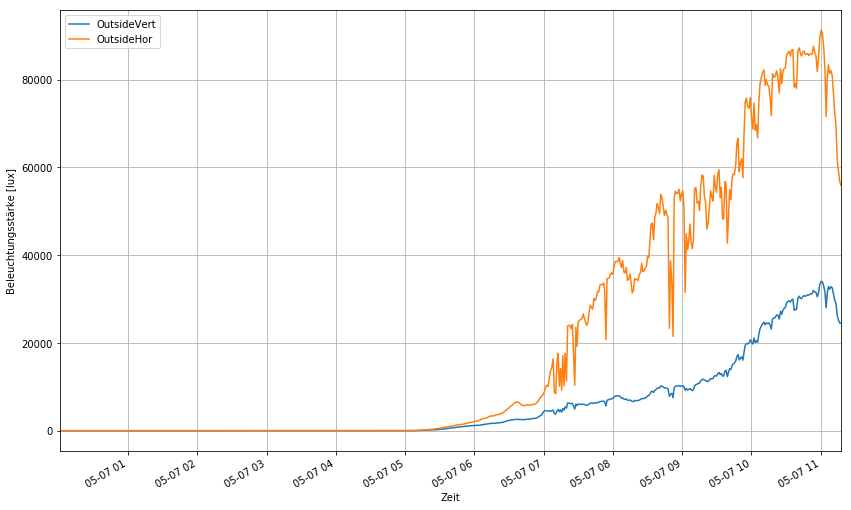

In [88]:
df_today = df.loc["2019-05-07"]
df_today.head()

df_today_out = df_today[['OutsideVert','OutsideHor']]
df_today_out.head()

ax = df_today_out.plot(y=['OutsideVert','OutsideHor'],grid=True,figsize=(14,9))
ax.set_xlabel("Zeit")
ax.set_ylabel("Beleuchtungsstärke [lux]")

Text(0, 0.5, 'Beleuchtungsstärke [lux]')

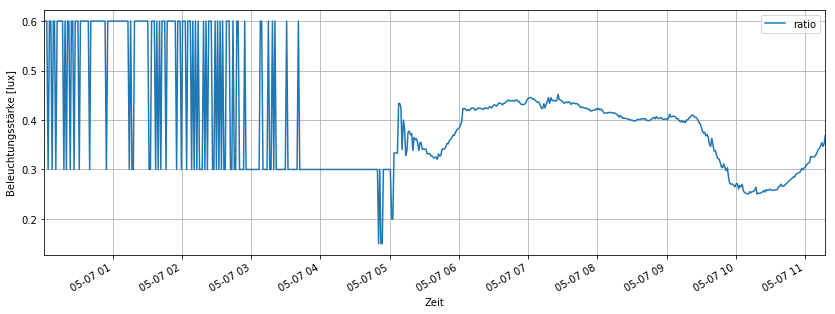

In [109]:
# Add column with ratio
df_today2 = df_today.copy() # copy to avoid error - numpy dosnt make copies!

df_today2['ratio'] = df_today2['InsideCeiling']/df_today2['OutsideVert']*100

ax = df_today2.plot(y='ratio',grid=True,figsize=(14,5))
ax.set_xlabel("Zeit")
ax.set_ylabel("Beleuchtungsstärke [lux]")

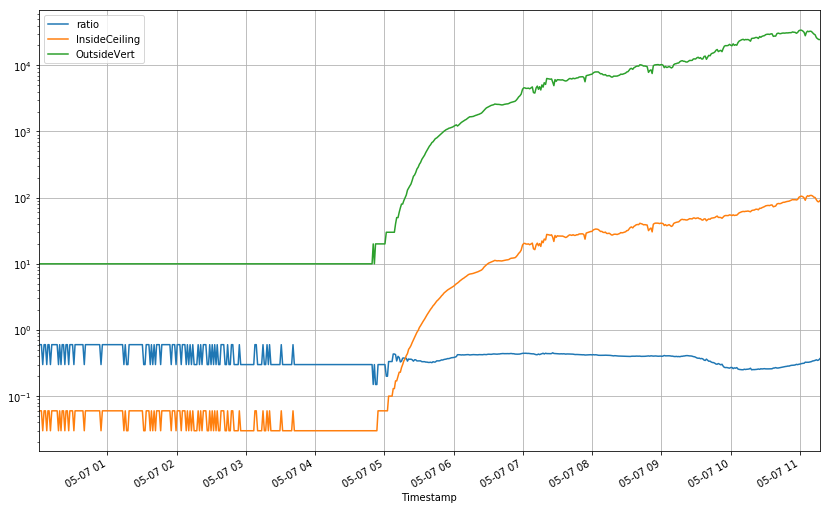

In [106]:
df_today2.plot(y=['ratio','InsideCeiling','OutsideVert'],grid=True,figsize=(14,9),loglog=True)

plt.show()